In [1]:
# 1. 필요한 라이브러리 및 모듈 import
import sys
sys.path.append('../src')  # src 디렉토리를 Python 경로에 추가

import pandas as pd
import numpy as np
from ml_project.data.preprocessing import DataPreprocessor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. 샘플 데이터 로드
sample_data = pd.read_csv('../data/raw/csv_files/sample_weather_data.csv')

In [3]:
# 3. 데이터 기본 정보 확인
print("데이터 형태:", sample_data.shape)
print("\n기본 정보:")
print(sample_data.info())
print("\n기술 통계량:")
print(sample_data.describe())

데이터 형태: (1000, 4)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    905 non-null    float64
 1   humidity       894 non-null    float64
 2   wind_speed     891 non-null    float64
 3   precipitation  904 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB
None

기술 통계량:
       temperature    humidity  wind_speed  precipitation
count   905.000000  894.000000  891.000000     904.000000
mean     20.081718   60.972768    4.971870       0.971956
std       4.941577   15.060346    1.993786       0.975022
min       3.793663   15.894170   -1.039024       0.000031
25%      16.736880   50.868511    3.646727       0.285178
50%      20.134429   61.091144    4.952896       0.674053
75%      23.238443   70.970812    6.273810       1.310180
max      39.263657  107.896614   12.852475       6.096554


In [4]:
# 4. 결측치 현황 확인
missing_stats = sample_data.isnull().sum()
print("\n결측치 현황:")
print(missing_stats)


결측치 현황:
temperature       95
humidity         106
wind_speed       109
precipitation     96
dtype: int64


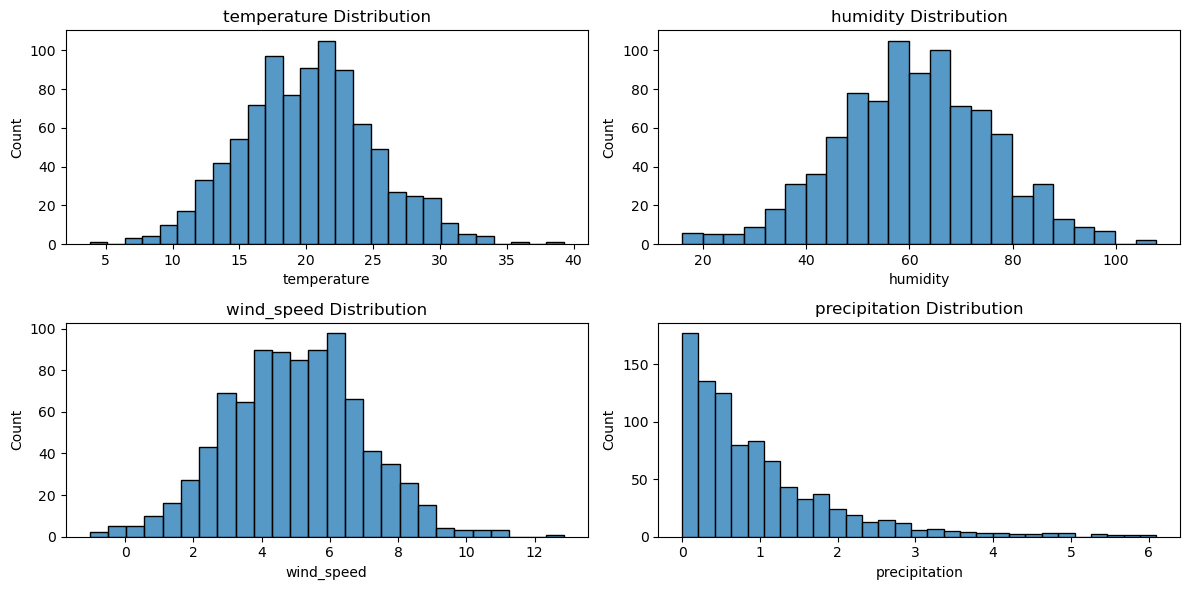

In [5]:
# 5. 결측치 처리 전 데이터 분포 시각화
plt.figure(figsize=(12, 6))
for i, column in enumerate(sample_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=sample_data, x=column)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

In [6]:
# 6. DataPreprocessor를 사용하여 결측치 처리
preprocessor = DataPreprocessor()

In [7]:
# 다양한 전략으로 테스트
strategies = {
    'temperature': 'mean',
    'humidity': 'median',
    'wind_speed': 'mean',
    'precipitation': 'median'
}

cleaned_data = preprocessor.handle_missing_values(sample_data, strategies)

250120_143608 - [ml_project.data.preprocessing:46] - INFO - [ preprocessing.py:handle_missing_values ] Missing value statistics:
temperature       95
humidity         106
wind_speed       109
precipitation     96
dtype: int64
250120_143608 - [ml_project.data.preprocessing:58] - INFO - [ preprocessing.py:handle_missing_values ] Handling missing values in temperature using mean
250120_143608 - [ml_project.data.preprocessing:58] - INFO - [ preprocessing.py:handle_missing_values ] Handling missing values in humidity using median
250120_143608 - [ml_project.data.preprocessing:58] - INFO - [ preprocessing.py:handle_missing_values ] Handling missing values in wind_speed using mean
250120_143608 - [ml_project.data.preprocessing:58] - INFO - [ preprocessing.py:handle_missing_values ] Handling missing values in precipitation using median
250120_143608 - [ml_project.data.preprocessing:77] - INFO - [ preprocessing.py:handle_missing_values ] Remaining missing values: 0


In [8]:
# 7. 처리 결과 확인
print("\n처리 후 결측치 현황:")
print(cleaned_data.isnull().sum())


처리 후 결측치 현황:
temperature      0
humidity         0
wind_speed       0
precipitation    0
dtype: int64


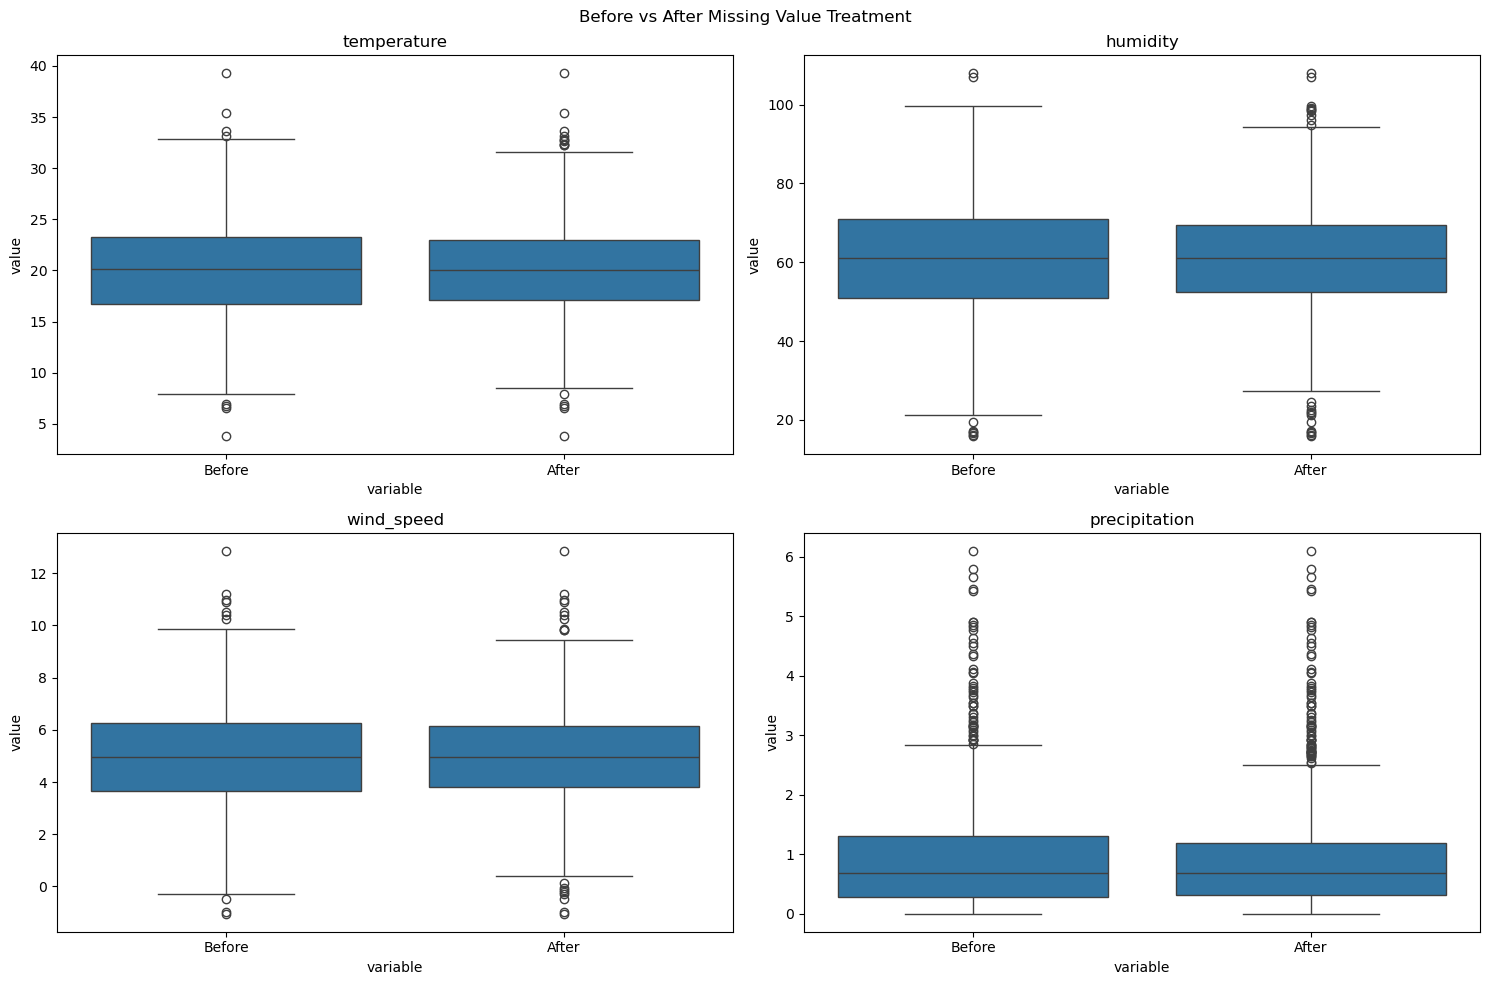

In [9]:
# 8. 처리 전/후 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Before vs After Missing Value Treatment')

for idx, column in enumerate(sample_data.columns):
    row = idx // 2
    col = idx % 2
    
    sns.boxplot(data=pd.DataFrame({
        'Before': sample_data[column],
        'After': cleaned_data[column]
    }).melt(), x='variable', y='value', ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [12]:
# 9. 기술 통계량 비교
print("\n처리 전/후 기술 통계량 비교:")
before_stats = sample_data.describe().round(2)
after_stats = cleaned_data.describe().round(2)

# DataFrame으로 비교표 만들기
comparison = pd.concat([before_stats, after_stats], 
                        axis=1, 
                        keys=['Before', 'After'])
print(comparison)


처리 전/후 기술 통계량 비교:
           Before                                         After           \
      temperature humidity wind_speed precipitation temperature humidity   
count      905.00   894.00     891.00        904.00     1000.00  1000.00   
mean        20.08    60.97       4.97          0.97       20.08    60.99   
std          4.94    15.06       1.99          0.98        4.70    14.24   
min          3.79    15.89      -1.04          0.00        3.79    15.89   
25%         16.74    50.87       3.65          0.29       17.12    52.55   
50%         20.13    61.09       4.95          0.67       20.08    61.09   
75%         23.24    70.97       6.27          1.31       22.94    69.37   
max         39.26   107.90      12.85          6.10       39.26   107.90   

                                
      wind_speed precipitation  
count    1000.00       1000.00  
mean        4.97          0.94  
std         1.88          0.93  
min        -1.04          0.00  
25%         3.82      